In [2]:
#import xml.etree.ElementTree as ET
from lxml import etree as ET
import pandas as pd
import matplotlib.pyplot as plt
import random


In [3]:

# Function to parse XES file and extract data
def parse_xes(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define XES namespace
    namespace = {'xes': 'http://www.xes-standard.org/'}

    # Prepare a list to store events
    data = []

    # Iterate over traces
    for trace in root.findall('trace', namespace):
        case_id = None
        case_attributes = {}

        # Extract case attributes
        for attr in trace.findall('string', namespace):
            if attr.get('key') == 'concept:name':
                case_id = attr.get('value')
            else:
                case_attributes[attr.get('key')] = attr.get('value')

        for attr in trace.findall('int', namespace):
            case_attributes[attr.get('key')] = int(attr.get('value'))

        for attr in trace.findall('float', namespace):
            case_attributes[attr.get('key')] = float(attr.get('value'))

        for attr in trace.findall('boolean', namespace):
            case_attributes[attr.get('key')] = attr.get('value') == 'true'

        # Extract events in the trace
        for event in trace.findall('event', namespace):
            event_data = case_attributes.copy()
            event_data['case_id'] = case_id

            for attr in event.findall('int', namespace):
                event_data[attr.get('key')] = int(attr.get('value'))

            for attr in event.findall('string', namespace):
                event_data[attr.get('key')] = attr.get('value')

            for attr in event.findall('date', namespace):
                event_data[attr.get('key')] = attr.get('value')

            for attr in event.findall('float', namespace):
                event_data[attr.get('key')] = float(attr.get('value'))

            for attr in event.findall('boolean', namespace):
                event_data[attr.get('key')] = attr.get('value') == 'true'

            data.append(event_data)

    return pd.DataFrame(data)

In [4]:
# Load and parse the XES file
file_path = 'Sepsis/sepsis.xes'
event_log_df = parse_xes(file_path)
# Save the parsed data to a CSV for further analysis
event_log_df.to_csv('event_log.csv', index=False)

In [5]:
print(event_log_df.columns)

Index(['case_id', 'Age', 'org:group', 'concept:name', 'lifecycle:transition',
       'Diagnose', 'time:timestamp', 'InfectionSuspected', 'DiagnosticBlood',
       'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate',
       'Infusion', 'DiagnosticArtAstrup', 'DiagnosticIC', 'DiagnosticSputum',
       'DiagnosticLiquor', 'DiagnosticOther', 'SIRSCriteria2OrMore',
       'DiagnosticXthorax', 'SIRSCritTemperature', 'DiagnosticUrinaryCulture',
       'SIRSCritLeucos', 'Oligurie', 'DiagnosticLacticAcid', 'Hypoxie',
       'DiagnosticUrinarySediment', 'DiagnosticECG', 'Leucocytes', 'CRP',
       'LacticAcid'],
      dtype='object')


In [6]:
# Display summary of the data
print("Event log parsed successfully!")
print(event_log_df.head())

Event log parsed successfully!
  case_id   Age org:group     concept:name lifecycle:transition Diagnose  \
0       A  85.0         A  ER Registration             complete        A   
1       A   NaN         B       Leucocytes             complete      NaN   
2       A   NaN         B              CRP             complete      NaN   
3       A   NaN         B       LacticAcid             complete      NaN   
4       A   NaN         C        ER Triage             complete      NaN   

                  time:timestamp InfectionSuspected DiagnosticBlood  \
0  2014-10-22T11:15:41.000+02:00               True            True   
1  2014-10-22T11:27:00.000+02:00                NaN             NaN   
2  2014-10-22T11:27:00.000+02:00                NaN             NaN   
3  2014-10-22T11:27:00.000+02:00                NaN             NaN   
4  2014-10-22T11:33:37.000+02:00                NaN             NaN   

  DisfuncOrg  ... DiagnosticUrinaryCulture SIRSCritLeucos Oligurie  \
0       True  .

In [7]:
# Example analysis: Count events per case
case_event_counts = event_log_df.groupby('case_id').size()
print("\nNumber of events per case:")
print(case_event_counts)


Number of events per case:
case_id
A      22
AA      8
AAA    11
AB      8
ABA    17
       ..
ZV     12
ZW     13
ZX     10
ZY      8
ZZ     14
Length: 1050, dtype: int64


In [8]:
# Example: Analyze activities by frequency
activity_counts = event_log_df['concept:name'].value_counts()
print("\nActivity frequency:")
print(activity_counts)


Activity frequency:
concept:name
Leucocytes          3383
CRP                 3262
LacticAcid          1466
Admission NC        1182
ER Triage           1053
ER Registration     1050
ER Sepsis Triage    1049
IV Antibiotics       823
IV Liquid            753
Release A            671
Return ER            294
Admission IC         117
Release B             56
Release C             25
Release D             24
Release E              6
Name: count, dtype: int64


In [9]:
def analyze_age_distribution(df, age_column='age'):
    # Convert age values to numeric, ignoring errors
    df[age_column] = pd.to_numeric(df[age_column], errors='coerce')

    # Drop rows with NaN age
    age_data = df[age_column].dropna()

    # Summary statistics
    print("Age Statistics:")
    print(age_data.describe())

    # Plot distribution
    plt.figure(figsize=(10, 6))
    plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribution of Ages")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Age Statistics:
count    1050.000000
mean       70.080952
std        17.356744
min        20.000000
25%        60.000000
50%        75.000000
75%        85.000000
max        90.000000
Name: Age, dtype: float64


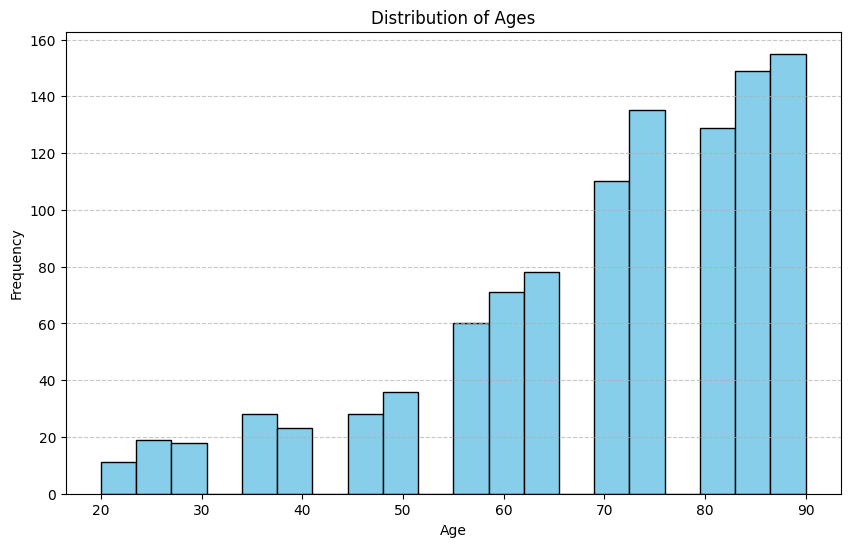

In [10]:
# Analyze and plot age distribution
analyze_age_distribution(event_log_df, age_column='Age')

In [11]:
# Count the number of people for each age
age_counts = event_log_df['Age'].value_counts()

# Display the counts
print("Number of people for each age:")
print(age_counts)

Number of people for each age:
Age
90.0    155
85.0    149
75.0    135
80.0    129
70.0    110
65.0     78
60.0     71
55.0     60
50.0     36
45.0     28
35.0     28
40.0     23
25.0     19
30.0     18
20.0     11
Name: count, dtype: int64


In [12]:
# Extract the year from the event dates
event_log_df['year'] = pd.to_datetime(event_log_df['time:timestamp'], utc=True).dt.year

# Group by the year and count the number of traces
traces_per_year = event_log_df.groupby('year')['case_id'].nunique()

# Display the counts
print("Number of traces per year:")
print(traces_per_year)

Number of traces per year:
year
2013     78
2014    930
2015    125
Name: case_id, dtype: int64


In [13]:
# Group by year and age, then count the number of occurrences
age_counts_per_year = event_log_df.groupby(['year', 'Age']).size().unstack(fill_value=0)

# Display the counts
print("Number of people for each age split by year:")
print(age_counts_per_year)

Number of people for each age split by year:
Age   20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  60.0  65.0  70.0  75.0  \
year                                                                           
2013     0     2     0     1     1     1     1     3     0     6    12    14   
2014    10    15    17    23    18    27    31    54    67    68    93   108   
2015     1     2     1     4     4     0     4     3     4     4     5    13   

Age   80.0  85.0  90.0  
year                    
2013    15    10    12  
2014   107   128   134  
2015     7    11     9  


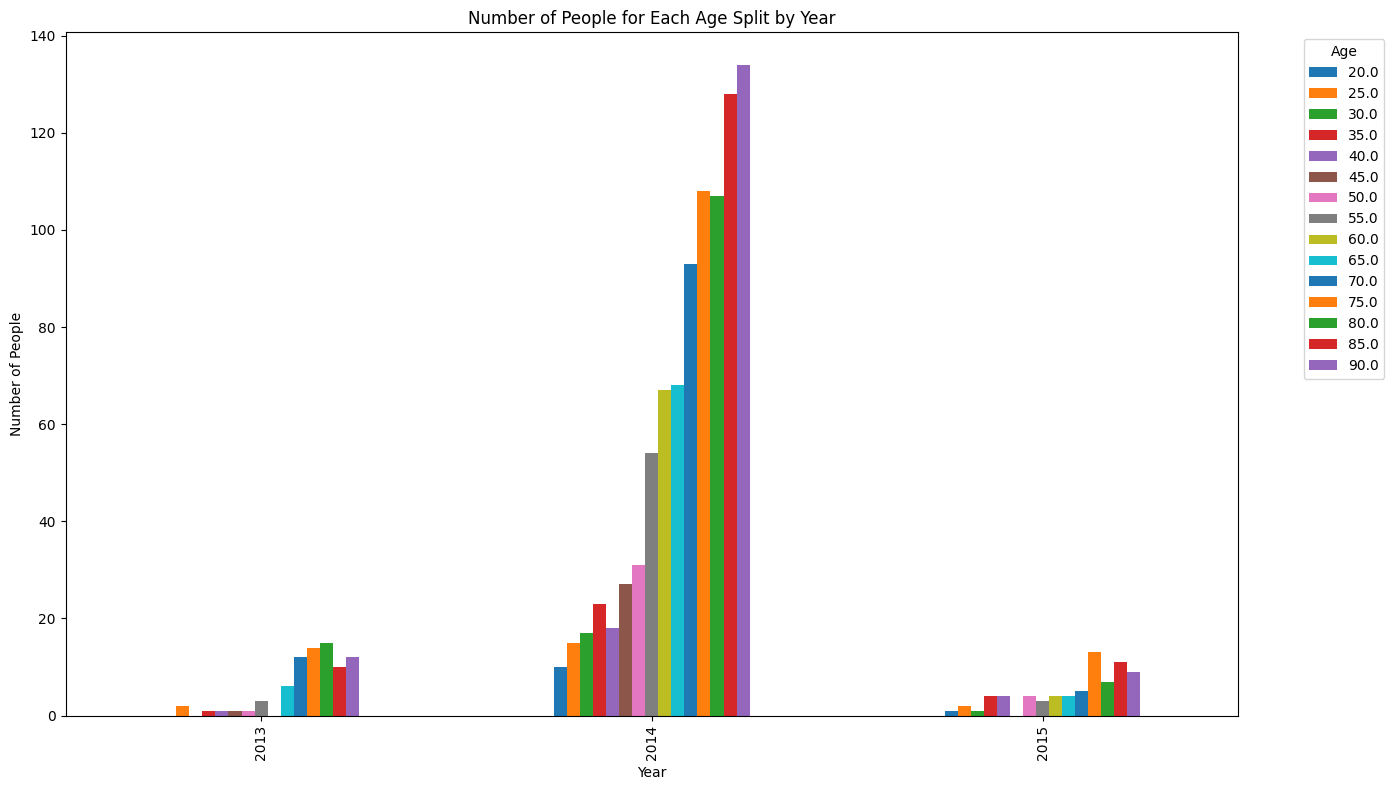

In [14]:
import matplotlib.pyplot as plt

# Plot the number of people for each age split by year
age_counts_per_year.plot(kind='bar', figsize=(14, 8))

# Set the title and labels
plt.title('Number of People for Each Age Split by Year')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
print(event_log_df.dtypes)

case_id                       object
Age                          float64
org:group                     object
concept:name                  object
lifecycle:transition          object
Diagnose                      object
time:timestamp                object
InfectionSuspected            object
DiagnosticBlood               object
DisfuncOrg                    object
SIRSCritTachypnea             object
Hypotensie                    object
SIRSCritHeartRate             object
Infusion                      object
DiagnosticArtAstrup           object
DiagnosticIC                  object
DiagnosticSputum              object
DiagnosticLiquor              object
DiagnosticOther               object
SIRSCriteria2OrMore           object
DiagnosticXthorax             object
SIRSCritTemperature           object
DiagnosticUrinaryCulture      object
SIRSCritLeucos                object
Oligurie                      object
DiagnosticLacticAcid          object
Hypoxie                       object
D

In [16]:
# Group by year and age, then count the number of occurrences
age_counts_per_year = event_log_df.groupby(['year', 'Age']).size().unstack(fill_value=0)

# Convert the grouped data into dictionaries
age_distribution_per_year = age_counts_per_year.to_dict(orient='index')

# Display the dictionaries
for year, age_distribution in age_distribution_per_year.items():
    print(f"Year {year}:")
    print(age_distribution)

Year 2013:
{20.0: 0, 25.0: 2, 30.0: 0, 35.0: 1, 40.0: 1, 45.0: 1, 50.0: 1, 55.0: 3, 60.0: 0, 65.0: 6, 70.0: 12, 75.0: 14, 80.0: 15, 85.0: 10, 90.0: 12}
Year 2014:
{20.0: 10, 25.0: 15, 30.0: 17, 35.0: 23, 40.0: 18, 45.0: 27, 50.0: 31, 55.0: 54, 60.0: 67, 65.0: 68, 70.0: 93, 75.0: 108, 80.0: 107, 85.0: 128, 90.0: 134}
Year 2015:
{20.0: 1, 25.0: 2, 30.0: 1, 35.0: 4, 40.0: 4, 45.0: 0, 50.0: 4, 55.0: 3, 60.0: 4, 65.0: 4, 70.0: 5, 75.0: 13, 80.0: 7, 85.0: 11, 90.0: 9}


# Generate Patient Data

In [21]:
# Define random names and surnames for patients
names = [
    "Aaron", "Abby", "Adam", "Aiden", "Alice", "Amelia", "Andrew", "Angela", "Anna", "Anthony",
    "Aria", "Arthur", "Ava", "Barbara", "Ben", "Benjamin", "Beth", "Blake", "Brandon", "Brian",
    "Brittany", "Brody", "Caleb", "Cameron", "Carla", "Carmen", "Carter", "Catherine", "Charlie",
    "Chloe", "Chris", "Christian", "Claire", "Clara", "Colin", "Connor", "Courtney", "Crystal",
    "Daniel", "David", "Diana", "Dominic", "Dylan", "Edward", "Eleanor", "Elena", "Eli", "Elijah",
    "Elizabeth", "Ella", "Emily", "Emma", "Eric", "Ethan", "Eva", "Evan", "Evelyn", "Faith",
    "Felix", "Finn", "Fiona", "Gabriel", "Grace", "Gregory", "Hannah", "Harper", "Hazel", "Henry",
    "Hunter", "Ian", "Isabel", "Isabella", "Isaac", "Jack", "Jacob", "James", "Jasmine", "Jason",
    "Jenna", "Jeremy", "Jessica", "Jillian", "John", "Jonathan", "Jordan", "Joseph", "Joshua",
    "Julia", "Julian", "Justin", "Kaitlyn", "Karen", "Katherine", "Katie", "Kayla", "Kevin",
    "Kimberly", "Kyle", "Laura", "Lauren", "Liam", "Lila", "Lillian", "Lily", "Logan", "Lucas",
    "Lucy", "Luke", "Madeline", "Madison", "Maggie", "Maria", "Mark", "Mason", "Matthew", "Maya",
    "Megan", "Michael", "Michelle", "Miles", "Molly", "Morgan", "Nathan", "Natalie", "Nathaniel",
    "Nicholas", "Nicole", "Noah", "Nora", "Oliver", "Olivia", "Owen", "Paige", "Patrick", "Paul",
    "Penelope", "Peter", "Phoebe", "Rachel", "Rebecca", "Riley", "Robert", "Ryan", "Samantha",
    "Samuel", "Sarah", "Savannah", "Scott", "Sean", "Sebastian", "Serena", "Sophia", "Sophie",
    "Spencer", "Stephanie", "Steven", "Sydney", "Taylor", "Thomas", "Tiffany", "Timothy", "Tristan",
    "Tyler", "Vanessa", "Victoria", "Violet", "William", "Wyatt", "Zachary", "Zoe", "Abigail",
    "Adrian", "Albert", "Alex", "Alexander", "Alexandra", "Allison", "Amber", "Angel", "April",
    "Arianna", "Ashley", "Austin", "Autumn", "Avery", "Bailey", "Becky", "Bianca", "Blair", "Bradley",
    "Brenda", "Brianna", "Bryce", "Camila", "Carl", "Carly", "Cecilia", "Cedric", "Charlotte",
    "Chelsea", "Chester", "Clayton", "Clifford", "Clinton", "Cole", "Cooper", "Dakota", "Dale",
    "Damian", "Danielle", "Dean", "Deborah", "Declan", "Delilah", "Dennis", "Desmond", "Destiny",
    "Devin", "Diego", "Dillon", "Doris", "Drew", "Dwayne", "Dylan", "Edgar", "Edith", "Edison",
    "Elianna", "Elise", "Ellie", "Elliot", "Elsa", "Emerson", "Emery", "Emmett", "Enzo", "Erica",
    "Esme", "Esther", "Ezekiel", "Faye", "Francis", "Frank", "Francesca", "Freddie", "Freya",
    "Gabriella", "Gavin", "Genevieve", "Georgia", "Gianna", "Gideon", "Gilbert", "Giovanni",
    "Gloria", "Gordon", "Grace", "Grant", "Greta", "Griffin", "Guadalupe", "Gwendolyn", "Hailey",
    "Haley", "Harrison", "Harvey", "Heather", "Heidi", "Helen", "Helena", "Holly", "Hudson",
    "Imogen", "India", "Indigo", "Ingrid", "Irene", "Irving", "Isla", "Ivy", "Izzy", "Jackie",
    "Jacqueline", "Jake", "Jared", "Jaxon", "Jayden", "Jean", "Jeffrey", "Jeremiah", "Jerry",
    "Jesse", "Joanna", "Joey", "Jolene", "Jonah", "Josephine", "Joy", "Judith", "Jude", "Julie",
    "Juliette", "June", "Kai", "Kara", "Kari", "Karina", "Kate", "Katelyn", "Katrina", "Kendall",
    "Kennedy", "Kent", "Kieran", "Killian", "Kim", "Kirsten", "Kody", "Kurt", "Lacey", "Lana",
    "Lara", "Larry", "Layla", "Leah", "Leighton", "Leo", "Leona", "Liam", "Libby", "Lila", "Lincoln",
    "Lindsey", "Lionel", "Lola", "Louisa", "Luis", "Luna", "Mabel", "Madeline", "Mae", "Malcolm",
    "Marcel", "Marco", "Mariah", "Mariana", "Marilyn", "Marissa", "Marshall", "Martha", "Martin",
    "Mary", "Matilda", "Max", "Maxwell", "Melanie", "Melody", "Melissa", "Mia", "Micah", "Michaela",
    "Miguel", "Mila", "Milton", "Miranda", "Mitchell", "Mona", "Monica", "Myra", "Nancy", "Naomi",
    "Natalia", "Neal", "Neil", "Nelson", "Nia", "Nick", "Nicolas", "Nina", "Noelle", "Nolan", "Norah",
    "Nova", "Oscar", "Pamela", "Patricia", "Paula", "Pearl", "Percy", "Peyton", "Phillip", "Pierce",
    "Poppy", "Quentin", "Quinn", "Rafael", "Raina", "Ramona", "Randall", "Raymond", "Reagan",
    "Reed", "Regina", "Remy", "Rene", "Rex", "Rhys", "Ricardo", "Rita", "Robin", "Rory", "Rose",
    "Ross", "Rowan", "Ruby", "Ryder", "Sadie", "Sage", "Sally", "Samson", "Sandra", "Santiago",
    "Sara", "Savannah", "Sawyer", "Scarlett", "Scott", "Selena", "Serena", "Shane", "Sharon",
    "Sheila", "Shelby", "Shiloh", "Silas", "Simon", "Skye", "Sloane", "Sonya", "Spencer", "Stacy",
    "Stanley", "Stella", "Stephen", "Sterling", "Stewart", "Suzanne", "Sylvia", "Tanner", "Tara",
    "Tate", "Teddy", "Teegan", "Tessa", "Theo", "Theresa", "Thomas", "Tina", "Tobias", "Todd",
    "Tony", "Tracy", "Travis", "Trevor", "Troy", "Tyson", "Ulysses", "Valerie", "Van", "Vera",
    "Veronica", "Victor", "Vivian", "Walter", "Warren", "Wayne", "Wendy", "Wesley", "Whitney",
    "Will", "Willow", "Winston", "Xander", "Xavier", "Yasmin", "Yvette", "Yvonne", "Zane", "Zelda",
    "Zion", "Zoey"
]

surnames = [
    "Adams", "Alexander", "Ali", "Allen", "Anderson", "Armstrong", "Arnold", "Atkinson", "Austin", "Bailey",
    "Baker", "Ball", "Banks", "Barber", "Barnes", "Barrett", "Bates", "Beck", "Bell", "Bennett",
    "Berry", "Black", "Blake", "Booth", "Bradley", "Brady", "Brooks", "Brown", "Bryant", "Burns",
    "Burton", "Butler", "Campbell", "Carter", "Chambers", "Chapman", "Chavez", "Clark", "Coleman",
    "Collins", "Cook", "Cooper", "Cox", "Craig", "Crawford", "Cross", "Cruz", "Cunningham",
    "Daniels", "Davidson", "Davies", "Davis", "Day", "Dean", "Diaz", "Dixon", "Douglas", "Duncan",
    "Dunn", "Edwards", "Elliott", "Ellis", "Evans", "Ferguson", "Fisher", "Fleming", "Fletcher",
    "Flores", "Ford", "Foster", "Fox", "Francis", "Freeman", "Garcia", "Gardner", "Garrett",
    "George", "Gibson", "Gilbert", "Gillespie", "Gill", "Glover", "Gonzales", "Gonzalez", "Goodman",
    "Gordon", "Graham", "Grant", "Gray", "Green", "Greene", "Griffin", "Hall", "Hamilton", "Hammond",
    "Hansen", "Hanson", "Harding", "Harper", "Harris", "Harrison", "Hart", "Harvey", "Hawkins",
    "Hayes", "Henderson", "Henry", "Hernandez", "Hicks", "Hill", "Hines", "Hoffman", "Holland",
    "Holmes", "Howard", "Howell", "Hudson", "Hughes", "Hunter", "Jackson", "Jacobs", "James",
    "Jenkins", "Jennings", "Johnson", "Johnston", "Jones", "Jordan", "Joseph", "Kelley", "Kelly",
    "Kennedy", "Kerr", "Kim", "King", "Knight", "Lambert", "Lane", "Lawrence", "Lawson", "Lee",
    "Lewis", "Lloyd", "Long", "Lopez", "Love", "Lowe", "Lucas", "Lynch", "Marshall", "Martin",
    "Martinez", "Mason", "Matthews", "Maxwell", "McCarthy", "McDonald", "McGee", "McKenzie",
    "McLaughlin", "Mendoza", "Meyer", "Miller", "Mills", "Mitchell", "Moore", "Morales", "Morgan",
    "Morris", "Morrison", "Murphy", "Murray", "Myers", "Nelson", "Newman", "Newton", "Nguyen",
    "Nichols", "Nicholson", "Norton", "O’Brien", "O’Connor", "O’Donnell", "O’Neill", "Olson",
    "Ortiz", "Owens", "Palmer", "Parker", "Patel", "Patrick", "Payne", "Pearson", "Perez",
    "Perry", "Peterson", "Phillips", "Porter", "Powell", "Price", "Quinn", "Ramirez", "Ramos",
    "Reed", "Reid", "Reyes", "Reynolds", "Rice", "Richards", "Richardson", "Riley", "Rivera",
    "Roberts", "Robertson", "Robinson", "Rodriguez", "Rogers", "Romero", "Rose", "Ross", "Russell",
    "Ryan", "Salazar", "Sanders", "Sandoval", "Santiago", "Santos", "Schmidt", "Scott", "Sharp",
    "Shaw", "Shelton", "Shepherd", "Simpson", "Smith", "Spencer", "Stanley", "Stephens", "Stevens",
    "Stewart", "Stone", "Sullivan", "Summers", "Taylor", "Thomas", "Thompson", "Torres",
    "Townsend", "Tran", "Turner", "Valdez", "Vargas", "Vasquez", "Wagner", "Walker", "Wallace",
    "Walsh", "Walters", "Ward", "Waters", "Watkins", "Watson", "Weaver", "Webb", "Weber",
    "Welch", "Wells", "West", "Wheeler", "White", "Wilkins", "Williams", "Williamson",
    "Willis", "Wilson", "Wright", "Young", "Zimmerman", "Abbott", "Alvarez", "Anthony",
    "Bishop", "Carlson", "Dalton", "Everett", "Fitzgerald", "Grayson", "Hoffman",
    "Jefferson", "Kennedy", "Lang", "Mathis", "Nash", "Oliver", "Palmer", "Quincy", "Shepard",
    "Tate", "Underwood", "Valentine", "Wagner", "Xavier", "York", "Zuniga"
]

streets = [
    "Maple Street, Springfield", "Oak Avenue, Rivertown", "Pine Lane, Lakewood",
    "Birch Road, Greenfield", "Cedar Court, Riverdale", "Elm Drive, Willowtown",
    "Ash Street, Brookside", "Cherry Lane, Bayside", "Walnut Avenue, Highland",
    "Sycamore Road, Meadowbrook", "Magnolia Street, Sunnyvale", "Palm Drive, Oceanside",
    "Cypress Court, Rosewood", "Poplar Lane, Forestville", "Redwood Road, Clearview",
    "Pinehurst Avenue, Ridgefield", "Valley Street, Cloverfield", "Orchard Road, Mapleton",
    "Garden Street, Birchwood", "Meadow Lane, Fairfield", "Hillcrest Avenue, Crestwood",
    "Sunset Drive, Greenwood", "River Road, Edgewater", "Park Avenue, Bloomfield",
    "Elmwood Street, Sandstone", "Willow Lane, Oakridge", "Aspen Court, Pinecrest",
    "Lakeview Drive, Clear Lake", "Highland Road, Northfield", "Spring Street, Timberwood",
    "Horizon Drive, Westlake", "Sunrise Avenue, Elmwood", "Horizon Court, Fairview",
    "Woodland Road, Bridgeport", "Harbor Drive, Lakeside", "Summit Avenue, Riverview",
    "Ridgeway Street, Hilltop", "Forest Lane, Glenwood", "Seaview Road, Windermere",
    "Horizon Street, Belmont", "Crystal Avenue, Stonebridge", "Sunrise Lane, Waterford",
    "Serenity Drive, Clearbrook", "Starlight Avenue, Riverbend", "Moonlight Road, Brighton",
    "Sunshine Street, Bayshore", "Horizon Drive, Willow Creek", "Sunset Lane, Deerfield",
    "Vista Avenue, Southport", "Hilltop Street, Crestview", "Brookfield Road, Greenwood",
    "Waterfall Lane, Meadowview", "Mountain Road, Fairhaven", "Evergreen Avenue, Sandpoint",
    "Cliffside Drive, Ridgewood", "Oceanview Lane, Harborview", "Lakeshore Avenue, Driftwood",
    "Elmwood Court, Forest Haven", "Maple Drive, Pine Grove", "Birch Avenue, Whispering Pines",
    "Cedar Lane, Timber Ridge", "Oak Street, Sunny Hills", "Ash Drive, Rivermist",
    "Cherry Road, Valley Heights", "Walnut Lane, Lakehaven", "Poplar Court, Willow Glen",
    "Aspen Drive, Northbrook", "Magnolia Lane, Southridge", "Sequoia Avenue, Woodland Park",
    "Palm Court, Eastwood", "Cypress Lane, Briarwood", "Sycamore Street, Hillcrest",
    "Redwood Drive, Meadowlark", "Maplewood Avenue, Birch Valley", "Cedarwood Court, Brookhaven",
    "Willow Way, Creekside", "Highland Avenue, Rockford", "Valley Drive, Sunset Ridge",
    "Riverbend Street, Brookfield", "Sunset Drive, Glenview", "Sunrise Lane, Timber Valley",
    "Clearview Road, Stone Creek", "Oceanview Avenue, Driftwood Shores", "Harbor Lane, Bayside Ridge",
    "Starlight Street, Whispering Oaks", "Moonrise Avenue, Shadowbrook", "Sunshine Drive, Morningwood",
    "Crystal Court, Twilight Ridge", "Serenity Lane, Forest View", "Meadowbrook Drive, Ridgeview",
    "Vista Lane, Highland Grove", "Spring Avenue, Waterstone", "Orchard Street, Cloverwood",
    "Garden Lane, Valleyview", "Summit Drive, Ridgefield", "Cliffside Avenue, Crestwood Heights",
    "Lakeside Lane, Harborlight", "Hilltop Road, Stonebridge Hills", "Riverfront Drive, Clearbrook",
    "Willow Road, Bayside", "Aspen Avenue, Meadowview", "Birch Drive, Driftwood",
    "Cedar Street, Timberline", "Oakwood Lane, Whispering Willows", "Pinecrest Road, Morningstar",
    "Elmwood Avenue, Clear Ridge", "Maplewood Street, Hilltop Haven", "Redwood Lane, Riverview Heights",
    "Cypress Drive, Crystal Valley", "Poplar Road, Oakridge Hills", "Sycamore Avenue, Meadow Ridge",
    "Magnolia Street, Clover Heights", "Valley Road, Sunstone", "River Drive, Harbor Haven",
    "Garden Street, Pine Valley", "Spring Road, Fairmont", "Hillcrest Avenue, Shadowstone",
    "Horizon Drive, Moonlight Ridge", "Oceanview Street, Bayshore Ridge", "Crystal Lane, Morningdale",
    "Sunrise Avenue, Willow Heights", "Starlight Drive, Briarwood Hills", "Moonrise Lane, Driftwood Cove",
    "Meadow Lane, Sunrise Ridge", "Sunset Avenue, Stonebrook", "Mountain Drive, Ridgewood Park",
    "Clearview Street, Timberlake", "Brookside Lane, Meadowstone", "Valley Road, Forestwood",
    "Ridgeview Drive, Creststone", "Waterfall Avenue, Willow Ridge", "Serenity Lane, Sandridge",
    "Twilight Road, Northstone", "Morningwood Drive, Riverwood", "Shadowbrook Lane, Timberline Ridge",
    "Whispering Oaks Avenue, Meadow Creek", "Stonebridge Road, Forest Ridge", "Sunstone Lane, Ridgeview Park",
    "Amber Lane, Rosewood", "Autumn Drive, Evergreen", "Bayberry Street, Northpoint",
    "Blossom Court, Meadowbrook", "Bluebird Lane, Cedar Ridge", "Briarwood Drive, Springdale",
    "Brookstone Avenue, Hillside", "Buttercup Street, Clearfield", "Camellia Lane, Willow Grove",
    "Canyon Road, Shadow Creek", "Chestnut Street, Ridgewood", "Clover Lane, Southport",
    "Cobblestone Court, Rockhaven", "Country Club Road, Greenfield", "Creekside Avenue, Sunnyvale",
    "Crimson Lane, Harborview", "Daisy Drive, Meadow Heights", "Dogwood Lane, Riverview",
    "Driftwood Avenue, Oceanside", "Eagle Ridge Road, Stonefield", "Fernwood Lane, Pine Grove",
    "Foxglove Street, Timberlake", "Goldenrod Lane, Fairview", "Hawthorne Avenue, Westfield",
    "Hemlock Road, Birchwood", "Heron Drive, Waterford", "Hickory Lane, Bridgeport",
    "Honeysuckle Court, Sandridge", "Juniper Street, Harborlight", "Larkspur Road, Deerfield",
    "Lilac Lane, Crestview", "Marigold Drive, Valleyview", "Morningstar Avenue, Ridgefield",
    "Northwood Lane, Meadowstone", "Orchid Road, Hilltop", "Pebble Creek Drive, Greenwood",
    "Primrose Avenue, Rosemont", "Quail Hollow Road, Cliffside", "Riverside Lane, Seabrook",
    "Rosewood Drive, Highland", "Silver Birch Street, Lakewood", "Snowdrop Lane, Oakwood",
    "Spring Blossom Court, Elmwood", "Stonewall Road, Ridgewood", "Sugar Maple Avenue, Clearview",
    "Sunnyfield Drive, Bayside", "Sweetbriar Lane, Northwood", "Thistle Court, Meadowbrook",
    "Timberline Drive, Crystal Valley", "Tranquil Lane, Briarwood", "Wildflower Road, Brookside",
    "Winding Way, Creststone", "Woodland Avenue, Pinehurst", "Acorn Street, Fairmount",
    "Alder Lane, Rosewood Heights", "Amethyst Court, Willow Ridge", "Apple Blossom Avenue, Morningwood",
    "Arbor Street, Northbridge", "Aspen Lane, Maplewood", "Aurora Drive, Valleystone",
    "Beaver Brook Road, Clearview Estates", "Bellflower Lane, Ridgewood Park", "Birchwood Drive, Meadowbrook",
    "Blackberry Lane, Fairway Ridge", "Bridle Path Road, Seaside Hills", "Butterfly Court, Forest Heights",
    "Canyon View Drive, Greenhaven", "Cascade Lane, Springhill", "Cedarbrook Road, Whispering Pines",
    "Cherry Blossom Lane, Southridge", "Cider Mill Road, Timber Valley", "Cloudberry Court, Lakeview Estates",
    "Copper Ridge Road, Brookhaven", "Crimson Clover Lane, Valley Grove", "Cypress Hollow, Ridgeview Estates",
    "Deer Hollow Drive, Highland Springs", "Desert Willow Road, Pine Meadows", "Dewdrop Lane, Meadowlark",
    "Emerald Drive, Shady Acres", "Fawn Meadow Lane, Woodland Springs", "Forest Glen Drive, Harbor Ridge",
    "Golden Meadow Road, Timberline Estates", "Harvest Lane, Clearbrook Ridge", "Hazelwood Drive, Elm Valley",
    "Heather Glen Road, Sunny Ridge", "Hickory Hollow Lane, Meadowstone Heights", "Highland Meadow Drive, Crescent Ridge",
    "Hummingbird Lane, Whispering Woods", "Juniper Grove Court, Stone Ridge", "Lakeshore Drive, Woodland Haven",
    "Lavender Court, Rose Hill", "Lilac Blossom Lane, Meadowfield", "Maple Leaf Drive, Brookside Heights",
    "Meadow Mist Lane, Springwood", "Morning Glory Road, Timber Creek", "Mountain Laurel Drive, Green Meadow",
    "Pine Hollow Lane, Clear Ridge", "River Birch Road, Brookfield", "Sagewood Lane, North Haven",
    "Seabreeze Drive, Crystal Bay", "Shadowbrook Road, Highland Creek", "Silverleaf Lane, Stonebrook",
    "Snowberry Drive, Willow Valley", "Starlight Lane, Ridgefield Heights", "Sugar Plum Lane, Meadowgreen",
    "Timber Ridge Road, Northpoint", "Trillium Lane, Pinecrest", "Vista Ridge Drive, Morningstar",
    "Walnut Grove Lane, Fairhaven", "Whispering Willow Road, Sunrise Ridge", "Wildrose Lane, Cedarwood Estates",
    "Winterberry Drive, Forest Glen", "Woodhaven Drive, Sunnydale", "Woods Edge Lane, Timberwood",
    "Acacia Court, Glenbrook", "Amberwood Drive, Maplewood", "Autumn Breeze Lane, Ridgefield",
    "Baywood Drive, Pine Grove", "Briar Patch Road, Sandstone Heights", "Canyon Creek Lane, Willowwood",
    "Cottonwood Court, Driftwood", "Crabapple Lane, Harborview Estates", "Creek Hollow Road, Meadowbrook Estates",
    "Crystal Lake Road, Cedar Ridge", "Deer Path Lane, Forest Haven", "Dove Meadow Drive, Morningview",
    "Elderberry Court, Valley Haven", "Frostwood Drive, Pine Meadows", "Glenwood Lane, Timberland Estates",
    "Golden Aspen Drive, Northfield", "Harvest Moon Lane, Ridgewood Heights", "Hearthstone Drive, Clearview Estates",
    "Hemlock Hollow, Meadow Glen", "Hidden Valley Drive, Seaside Hills", "Holly Leaf Lane, Sunrise Estates",
    "Ivywood Court, Whispering Meadows", "Juniper Knoll Road, Cedarwood", "Lakewood Drive, Highland Springs",
    "Lavender Bloom Lane, Meadowbrook Grove", "Magnolia Blossom Road, Shady Pines", "Morningview Lane, Sunnybrook"
]



In [18]:
import json
from datetime import datetime, timedelta
import random


def generate_random_address():
    street = random.choice(streets)
    number = random.randint(1, 9999)  # Generate a random number between 1 and 9999
    return f"{number} {street}"

#Generate the exact number of patients for each age
def generate_all_patients(age_distribution, reference_year):
    patients = []
    unique_ages = list(age_distribution.keys())
    #used_ids = set()
    i = 0
    for age, count in age_distribution.items():
        # Assign age and calculate birth year
        #age = random.choice(unique_ages)
        birth_year = reference_year - age
        for _ in range(count):
            # Generate random name and surname
            name = random.choice(names)
            surname = random.choice(surnames)

            patient_id = f"P{i+1}"

            #Generate random unique ID
            '''patient_id = f"P{random.randint(1000, 9999)}"
            while patient_id in used_ids:
                patient_id = f"P{random.randint(1000, 9999)}"
            used_ids.add(patient_id)'''

            # Generate a random birth date within the birth year
            birth_date = datetime(birth_year, 1, 1) + timedelta(days=random.randint(0, 364))
            birth_date_str = birth_date.strftime("%Y-%m-%d")

            # Assign random address
            address = generate_random_address()

            # Create patient dictionary
            patient = {
                "patient_id": patient_id,
                "name": name,
                "surname": surname,
                "birth_date": birth_date_str,
                "address": address
            }
            patients.append(patient)
            i+=1

    return patients

#Generate the number of patients for each age decreased by 20%
def generate_patients(id, age_distribution, reference_year):
    print(age_distribution)
    print(reference_year)
    patients = []
    for age, count in age_distribution.items():
        birth_year = reference_year - int(age)
        print(f"ref: {reference_year} -  Age: {age} - birth: {birth_year} - count: {count}")
        #for _ in range(count):
        for _ in range(int(count * 0.8)):
            # Generate random name and surname
            name = random.choice(names)
            surname = random.choice(surnames)

            patient_id = f"P{id+1}"

            birth_date = datetime(birth_year, 1, 1) + timedelta(days=random.randint(0, 364))
            birth_date_str = birth_date.strftime("%Y-%m-%d")

            # Assign random address
            address = generate_random_address()

            # Create patient dictionary
            patient = {
                "patient_id": patient_id,
                "name": name,
                "surname": surname,
                "birth_date": birth_date_str,
                "address": address
            }
            print(patient_id)
            patients.append(patient)
            id+=1


    return patients, id



# Group by year and age, then count the number of occurrences
age_counts_per_year = event_log_df.groupby(['year', 'Age']).size().unstack(fill_value=0)

# Convert the grouped data into dictionaries
age_distribution_per_year = age_counts_per_year.to_dict(orient='index')

patients = []
id=0
for year, age_distribution in age_distribution_per_year.items():
    print(f"{year}")
    p , id = generate_patients(id,age_distribution, year)
    patients.extend(p)

# Save to JSON file
output_file = "patients.json"
with open(output_file, "w") as file:
    json.dump(patients, file, indent=4)

print(f"Patient database saved to {output_file}")


2013
{20.0: 0, 25.0: 2, 30.0: 0, 35.0: 1, 40.0: 1, 45.0: 1, 50.0: 1, 55.0: 3, 60.0: 0, 65.0: 6, 70.0: 12, 75.0: 14, 80.0: 15, 85.0: 10, 90.0: 12}
2013
ref: 2013 -  Age: 20.0 - birth: 1993 - count: 0
ref: 2013 -  Age: 25.0 - birth: 1988 - count: 2
P1
ref: 2013 -  Age: 30.0 - birth: 1983 - count: 0
ref: 2013 -  Age: 35.0 - birth: 1978 - count: 1
ref: 2013 -  Age: 40.0 - birth: 1973 - count: 1
ref: 2013 -  Age: 45.0 - birth: 1968 - count: 1
ref: 2013 -  Age: 50.0 - birth: 1963 - count: 1
ref: 2013 -  Age: 55.0 - birth: 1958 - count: 3
P2
P3
ref: 2013 -  Age: 60.0 - birth: 1953 - count: 0
ref: 2013 -  Age: 65.0 - birth: 1948 - count: 6
P4
P5
P6
P7
ref: 2013 -  Age: 70.0 - birth: 1943 - count: 12
P8
P9
P10
P11
P12
P13
P14
P15
P16
ref: 2013 -  Age: 75.0 - birth: 1938 - count: 14
P17
P18
P19
P20
P21
P22
P23
P24
P25
P26
P27
ref: 2013 -  Age: 80.0 - birth: 1933 - count: 15
P28
P29
P30
P31
P32
P33
P34
P35
P36
P37
P38
P39
ref: 2013 -  Age: 85.0 - birth: 1928 - count: 10
P40
P41
P42
P43
P44
P45
P4


# Add Patient Data to Sepsis with duplicates and no overlapping dates

In [19]:
def add_patient_info_dup(input_xes, output_xes, patients_by_year):
    tree = ET.parse(input_xes)
    root = tree.getroot()

    # Define XES namespace
    namespace = {'xes': 'http://www.xes-standard.org/'}
    ET.register_namespace('xes', 'http://www.xes-standard.org/')

    # Track assigned dates for each patient to avoid overlapping assignments
    patient_assigned_dates = {
        patient["patient_id"]: []
        for year_data in patients_by_year.values()
        for age_group in year_data.values()
        for patient in age_group
    }

    def is_date_overlapping(patient_id, start_date, end_date):
        """Check if a patient has overlapping trace dates."""
        for assigned_start, assigned_end in patient_assigned_dates[patient_id]:
            if not (end_date < assigned_start or start_date > assigned_end):  # Overlap condition
                return True
        return False

    # Assign patients to traces
    for trace in root.findall('trace', namespace):
        # Calculate trace start and end dates
        trace_start_date = min([
            datetime.strptime(event.find('date[@key="time:timestamp"]', namespace).attrib['value'], "%Y-%m-%dT%H:%M:%S.%f%z")
            for event in trace.findall('event', namespace)
        ])
        trace_end_date = max([
            datetime.strptime(event.find('date[@key="time:timestamp"]', namespace).attrib['value'], "%Y-%m-%dT%H:%M:%S.%f%z")
            for event in trace.findall('event', namespace)
        ])

        for event in trace.findall('event', namespace):
            age_elem = event.find('int[@key="Age"]', namespace)
            if age_elem is not None:
                age = int(age_elem.attrib['value'])
                event_year = trace_start_date.year

                # Find possible patients for the age and year
                possible_patients = patients_by_year[event_year].get(age, [])
                assigned_patient = None

                if possible_patients:
                    # Try assigning a duplicate patient
                    duplicates = [
                        patient for patient in possible_patients
                        if not is_date_overlapping(patient["patient_id"], trace_start_date, trace_end_date)
                    ]
                    if duplicates and random.random() < 0.4:  # 40% chance to use a duplicate
                        assigned_patient = random.choice(duplicates)
                        print(assigned_patient)
                    else:
                        # Assign a new unique patient
                        assigned_patient = possible_patients.pop(0)

                # If no patient is available (edge case)
                if not assigned_patient:
                    continue

                # Record the patient's assigned trace date range
                patient_assigned_dates[assigned_patient["patient_id"]].append((trace_start_date, trace_end_date))

                # Add patient information to the event
                event.extend([
                    ET.Element("string", key="patient_id", value=assigned_patient["patient_id"]),
                    ET.Element("string", key="name", value=assigned_patient["name"]),
                    ET.Element("string", key="surname", value=assigned_patient["surname"]),
                    ET.Element("string", key="birth_date", value=assigned_patient["birth_date"]),
                    ET.Element("string", key="address", value=assigned_patient["address"]),
                ])

    # Save the modified XES file
    tree.write(output_xes, encoding="utf-8", xml_declaration=True)


# Load patients from JSON
with open("patients.json", "r") as file:
    patients = json.load(file)

# Define years to process
years = [2013, 2014, 2015]

# Function to split patients by year and age
def split_patients_by_year_dup(patients, years):
    patients_by_year = {year: {age: [] for age in range(0, 121)} for year in years}

    for patient in patients:
        birth_year = int(patient["birth_date"].split("-")[0])
        for year in years:
            age_in_year = year - birth_year
            if 0 <= age_in_year <= 120:  # Valid age range
                patients_by_year[year][age_in_year].append(patient)

    return patients_by_year


# Split patients by year and age
patients_by_year = split_patients_by_year_dup(patients, years)

# Input and output XES file paths
input_xes = "Sepsis/sepsis.xes"
output_xes = "output_log_with_patients_DUP_noOverlap.xes"

add_patient_info_dup(input_xes, output_xes, patients_by_year)

print(f"Modified XES file saved as {output_xes}")


{'patient_id': 'P568', 'name': 'Edgar', 'surname': 'Riley', 'birth_date': '1929-10-26', 'address': '1456 Whispering Willow Road, Sunrise Ridge'}
{'patient_id': 'P180', 'name': 'Lila', 'surname': 'Webb', 'birth_date': '1959-03-07', 'address': '2630 Starlight Drive, Briarwood Hills'}
{'patient_id': 'P356', 'name': 'Lauren', 'surname': 'Craig', 'birth_date': '1944-08-10', 'address': '1541 Lakeshore Drive, Woodland Haven'}
{'patient_id': 'P517', 'name': 'Declan', 'surname': 'Gillespie', 'birth_date': '1934-05-14', 'address': '9184 Highland Road, Northfield'}
{'patient_id': 'P39', 'name': 'Tessa', 'surname': 'Perez', 'birth_date': '1933-01-24', 'address': '8684 Cliffside Drive, Ridgewood'}
{'patient_id': 'P749', 'name': 'Delilah', 'surname': 'Hanson', 'birth_date': '1924-06-17', 'address': '3758 Brookfield Road, Greenwood'}
{'patient_id': 'P62', 'name': 'Carla', 'surname': 'Austin', 'birth_date': '1994-08-22', 'address': '7808 Maplewood Avenue, Birch Valley'}
{'patient_id': 'P123', 'name': 

# Generate Medical Staff Data

In [23]:
roles = ["Biologist", "Doctor", "Nurse"]

In [24]:
import json
import random


# Funzione per generare il personale medico
def generate_medical_staff(names, surnames, roles, staff_per_role=100):
    staff = []
    staff_id_counter = 0

    for role in roles:
        for _ in range(staff_per_role):
            # Seleziona un nome e un cognome casuale
            name = random.choice(names)
            surname = random.choice(surnames)

            # Crea l'identificativo
            staff_id = f"MS{staff_id_counter}"
            staff_id_counter += 1

            # Aggiungi il membro dello staff
            staff_member = {
                "staff_id": staff_id,
                "name": name,
                "surname": surname,
                "role": role
            }
            staff.append(staff_member)

    return staff

# Genera il personale medico
medical_staff = generate_medical_staff(names, surnames, roles)

# Salva il personale medico in un file JSON
output_file = "medical_staff.json"
with open(output_file, "w") as file:
    json.dump(medical_staff, file, indent=4)

print(f"Medical staff dataset saved to {output_file}")


Medical staff dataset saved to medical_staff.json


# Add Medical Staff Data to Sepsis - random assignment

In [25]:
import xml.etree.ElementTree as ET
import random
import json

def add_medical_staff(input_xes, output_xes, medical_staff):
    tree = ET.parse(input_xes)
    root = tree.getroot()

    # Define XES namespace
    namespace = {'xes': 'http://www.xes-standard.org/'}
    ET.register_namespace('xes', 'http://www.xes-standard.org/')

    # Organize staff by role
    staff_by_role = {
        "Nurse": [staff for staff in medical_staff if staff["role"] == "Nurse"],
        "Biologist": [staff for staff in medical_staff if staff["role"] == "Biologist"],
        "Doctor": [staff for staff in medical_staff if staff["role"] == "Doctor"],
    }

    # Events mapped to roles
    role_event_mapping = {
        "Nurse": ["ER Registration", "ER Triage", "ER Sepsis Triage"],
        "Biologist": ["Leucocytes", "CRP", "LacticAcid"],
        "Doctor": [
            "IV Antibiotics", "IV Liquid", "Admission NC", "Admission IC",
            "Release A", "Release B", "Release C", "Release D", "Release E", "Return ER"
        ],
    }

    # Assign staff to events
    for trace in root.findall('trace', namespace):
        for event in trace.findall('event', namespace):
            concept_name_elem = event.find('string[@key="concept:name"]', namespace)
            if concept_name_elem is not None:
                concept_name = concept_name_elem.attrib['value']
                assigned_role = None

                # Determine role for the event
                for role, events in role_event_mapping.items():
                    if concept_name in events:
                        assigned_role = role
                        break

                if assigned_role:
                    assigned_staff = random.choice(staff_by_role[assigned_role])

                    # Add staff information to the event
                    event.extend([
                        ET.Element("string", key="staff_id", value=assigned_staff["staff_id"]),
                        ET.Element("string", key="staff_name", value=assigned_staff["name"]),
                        ET.Element("string", key="staff_surname", value=assigned_staff["surname"]),
                        ET.Element("string", key="staff_role", value=assigned_staff["role"]),
                    ])

    # Save the modified XES file
    tree.write(output_xes, encoding="utf-8", xml_declaration=True)


# Load medical staff from JSON
with open("medical_staff.json", "r") as file:
    medical_staff = json.load(file)

# Input and output XES file paths
input_xes = "output_log_with_patients_DUP_noOverlap.xes"  # Input: XES with patients
output_xes = "output_log_with_patients_and_staff.xes"  # Output: XES with staff added

# Add medical staff to the log
add_medical_staff(input_xes, output_xes, medical_staff)

print(f"Modified XES file with staff saved as {output_xes}")


Modified XES file with staff saved as output_log_with_patients_and_staff.xes


# Add Medical Staff Data to Sepsis - with trace consistency

In [26]:
import xml.etree.ElementTree as ET
import random
import json

def add_medical_staff_with_consistency(input_xes, output_xes, medical_staff):
    tree = ET.parse(input_xes)
    root = tree.getroot()

    # Define XES namespace
    namespace = {'xes': 'http://www.xes-standard.org/'}
    ET.register_namespace('xes', 'http://www.xes-standard.org/')

    # Organize staff by role
    staff_by_role = {
        "Nurse": [staff for staff in medical_staff if staff["role"] == "Nurse"],
        "Biologist": [staff for staff in medical_staff if staff["role"] == "Biologist"],
        "Doctor": [staff for staff in medical_staff if staff["role"] == "Doctor"],
    }

    # Events mapped to roles
    role_event_mapping = {
        "Nurse": ["ER Registration", "ER Triage", "ER Sepsis Triage"],
        "Biologist": ["Leucocytes", "CRP", "LacticAcid"],
        "Doctor": [
            "IV Antibiotics", "IV Liquid", "Admission NC", "Admission IC",
            "Release A", "Release B", "Release C", "Release D", "Release E", "Return ER"
        ],
    }

    # Process each trace
    for trace in root.findall('trace', namespace):
        # Maintain consistency within a trace
        assigned_nurse = None
        assigned_doctor = None

        for event in trace.findall('event', namespace):
            concept_name_elem = event.find('string[@key="concept:name"]', namespace)
            if concept_name_elem is not None:
                concept_name = concept_name_elem.attrib['value']
                assigned_role = None

                # Determine role for the event
                for role, events in role_event_mapping.items():
                    if concept_name in events:
                        assigned_role = role
                        break

                if assigned_role:
                    if assigned_role == "Nurse":
                        # Assign a consistent nurse for triage events
                        if assigned_nurse is None:
                            assigned_nurse = random.choice(staff_by_role["Nurse"])
                        assigned_staff = assigned_nurse

                    elif assigned_role == "Doctor":
                        # Assign a consistent doctor for doctor events
                        if assigned_doctor is None:
                            assigned_doctor = random.choice(staff_by_role["Doctor"])
                        assigned_staff = assigned_doctor

                    elif assigned_role == "Biologist":
                        # Biologists can change, assign randomly
                        assigned_staff = random.choice(staff_by_role["Biologist"])

                    # Add staff information to the event
                    event.extend([
                        ET.Element("string", key="staff_id", value=assigned_staff["staff_id"]),
                        ET.Element("string", key="staff_name", value=assigned_staff["name"]),
                        ET.Element("string", key="staff_surname", value=assigned_staff["surname"]),
                        ET.Element("string", key="staff_role", value=assigned_staff["role"]),
                    ])

    # Save the modified XES file
    tree.write(output_xes, encoding="utf-8", xml_declaration=True)


# Load medical staff from JSON
with open("medical_staff.json", "r") as file:
    medical_staff = json.load(file)

# Input and output XES file paths
input_xes = "output_log_with_patients_DUP_noOverlap.xes"  # Input: XES with patients
output_xes = "output_log_with_patients_and_Traceconsistency.xes"  # Output: XES with consistent staff

# Add medical staff to the log with continuity
add_medical_staff_with_consistency(input_xes, output_xes, medical_staff)

print(f"Modified XES file with consistent staff saved as {output_xes}")


Modified XES file with consistent staff saved as output_log_with_patients_and_Traceconsistency.xes


# Add Medical Staff Data to Sepsis - with 6 hour shift assignments and 60% consistency in lab
- shift timeline
    - 00:00 - 06:00
    - 06:00 - 12:00
    - 12:00 - 18:00
    - 18:00 - 00:00
- A trace is assigned to a single Doctor and Nurse until the shift changes
- More biologists are working in the same shift
- There is a 60% chance that the same biologist will be assigned to the next event

Nurse event mapping:
- ER Registration
- ER Triage
- ER Sepsis Triage

Biologist event mapping:
- Leucocytes
- CRP
- LacticAcid

Doctor event mapping:
- IV Antibiotics
- IV Liquid
- Admission NC
- Admission IC
- Release A, Release B, Release C, Release D, Release E


In [55]:
import xml.etree.ElementTree as ET
import random
import json
from datetime import datetime, timedelta


def get_shift_from_time(timestamp):
    """Determine the shift based on the time of the event."""
    hour = timestamp.hour
    if 0 <= hour < 6:
        return 1  # 00:00 - 06:00
    elif 6 <= hour < 12:
        return 2  # 06:00 - 12:00
    elif 12 <= hour < 18:
        return 3  # 12:00 - 18:00
    else:
        return 4  # 18:00 - 00:00


def add_medical_staff_with_shifts(input_xes, output_xes, medical_staff):
    tree = ET.parse(input_xes)
    root = tree.getroot()

    # Define XES namespace
    namespace = {'xes': 'http://www.xes-standard.org/'}
    ET.register_namespace('xes', 'http://www.xes-standard.org/')

    # Organize staff by role
    staff_by_role = {
        "Nurse": [staff for staff in medical_staff if staff["role"] == "Nurse"],
        "Biologist": [staff for staff in medical_staff if staff["role"] == "Biologist"],
        "Doctor": [staff for staff in medical_staff if staff["role"] == "Doctor"],
    }

    # Events mapped to roles
    role_event_mapping = {
        "Nurse": ["ER Registration", "ER Triage", "ER Sepsis Triage"],
        "Biologist": ["Leucocytes", "CRP", "LacticAcid"],
        "Doctor": [
            "IV Antibiotics", "IV Liquid", "Admission NC", "Admission IC",
            "Release A", "Release B", "Release C", "Release D", "Release E", "Return ER"
        ],
    }

    # Process each trace
    for trace in root.findall('trace', namespace):
        # Track current staff and shift
        current_shift = None
        current_staff = {"Nurse": None, "Biologist": None, "Doctor": None}

        for event in trace.findall('event', namespace):
            concept_name_elem = event.find('string[@key="concept:name"]', namespace)
            timestamp_elem = event.find('date[@key="time:timestamp"]', namespace)

            if concept_name_elem is not None and timestamp_elem is not None:
                concept_name = concept_name_elem.attrib['value']
                event_timestamp = datetime.strptime(timestamp_elem.attrib['value'], "%Y-%m-%dT%H:%M:%S.%f%z")

                # Determine the current shift
                shift = get_shift_from_time(event_timestamp)

                # Check if the role is mapped for the event
                assigned_role = None
                for role, events in role_event_mapping.items():
                    if concept_name in events:
                        assigned_role = role
                        break
                #print(concept_name, assigned_role)
                if assigned_role:
                    # Ensure staff is assigned only if they exist
                    if assigned_role in current_staff and current_staff[assigned_role] is not None:
                        # Check if we need to assign new staff based on the shift
                        if shift == current_shift:
                            if (assigned_role == "Biologist"):
                                if (random.random() < 0.6):
                                    assigned_staff = current_staff[assigned_role]  # Keep the same biologist 60% of the time
                                else:
                                    #print(f"Cambia {assigned_role} ", trace.find('string[@key="concept:name"]', namespace).get('value'))
                                    assigned_staff = random.choice(staff_by_role[assigned_role])
                            else:
                                assigned_staff = current_staff[assigned_role]
                        else:
                            #print("Different shift")
                            assigned_staff = random.choice(staff_by_role[assigned_role])
                    else:
                        assigned_staff = random.choice(staff_by_role[assigned_role])
                    current_staff[assigned_role] = assigned_staff

                    #print(f"{assigned_staff} added to {current_staff} - {current_staff[assigned_role]}")

                current_shift = shift

                # Add staff information to the event
                event.extend([
                    ET.Element("string", key="staff_id", value=current_staff[assigned_role]["staff_id"]),
                    ET.Element("string", key="staff_name", value=current_staff[assigned_role]["name"]),
                    ET.Element("string", key="staff_surname", value=current_staff[assigned_role]["surname"]),
                    ET.Element("string", key="staff_role", value=current_staff[assigned_role]["role"]),
                ])



    # Save the modified XES file
    tree.write(output_xes, encoding="utf-8", xml_declaration=True)


# Load medical staff from JSON
with open("medical_staff.json", "r") as file:
    medical_staff = json.load(file)

# Input and output XES file paths
input_xes = "output_log_with_patients_DUP_noOverlap.xes"  # Input: XES with patients
output_xes = "output_log_with_patients_and_traceConsistency_shift.xes"

# Add medical staff to the log with shift-based assignments
add_medical_staff_with_shifts(input_xes, output_xes, medical_staff)

print(f"Modified XES file with staff and shifts saved as {output_xes}")


Modified XES file with staff and shifts saved as output_log_with_patients_and_Traceconsistency_turn.xes
